In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [29]:
df1=df.drop(columns=['total_claim_amount'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [35]:
print(df1['vehicle_size'].apply(type).value_counts())

<class 'str'>    10689
Name: vehicle_size, dtype: int64


In [37]:
# Create a data frame only with the columns that have numeric values
numerical = df1.select_dtypes(include='number')

categorical = df1.select_dtypes(exclude='number')

In [67]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


In [68]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

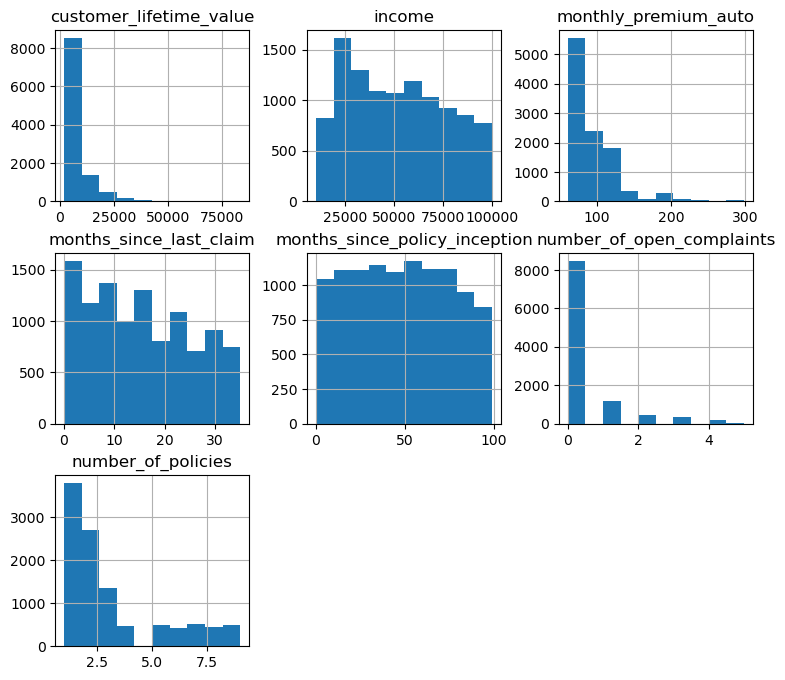

In [40]:
#Now we will try to check the normality of the numerical variables visually
 #Use seaborn library to construct distribution plots for the numerical variables
 #Use Matplotlib to construct histograms.
 #Do the distributions for different numerical variables look like a normal distribution?
    
df1.hist(figsize=(9,8))

<AxesSubplot:>

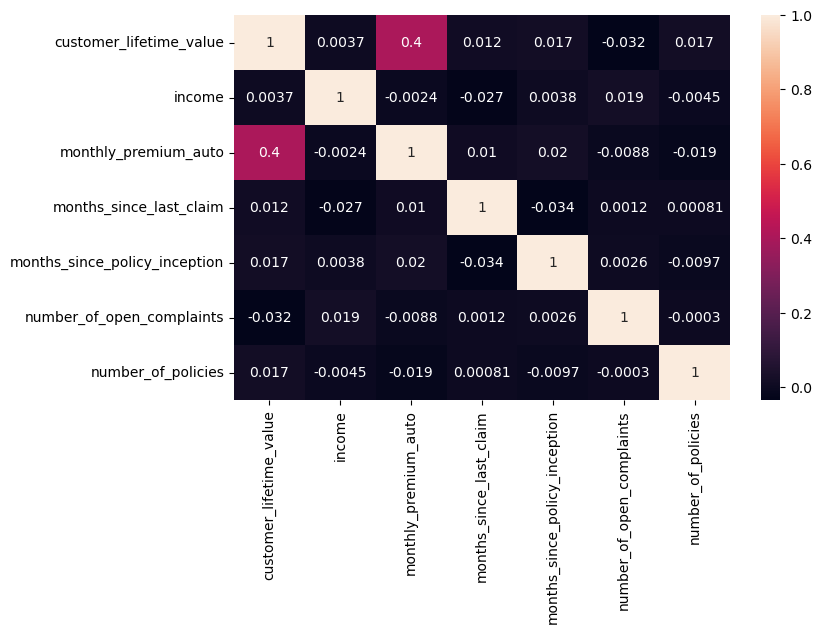

In [14]:
#For the numerical variables, check for correlation between the input features. 
#Note: this does not include the target feature.

fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

In [42]:
corr_matrix = df.corr().abs()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,0.032371,0.016789,0.232849
income,0.003732,1.000000,0.002431,0.026564,0.003846,0.018903,0.004461,0.111221
monthly_premium_auto,0.404235,0.002431,1.000000,0.010036,0.019696,0.008811,0.018805,0.630149
months_since_last_claim,0.011912,0.026564,0.010036,1.000000,0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,0.034086,1.000000,0.002554,0.009719,0.004186
number_of_open_complaints,0.032371,0.018903,0.008811,0.001204,0.002554,1.000000,0.000303,0.010668
number_of_policies,0.016789,0.004461,0.018805,0.000814,0.009719,0.000303,1.000000,0.008019
total_claim_amount,0.232849,0.111221,0.630149,0.013874,0.004186,0.010668,0.008019,1.000000


Lab Monday_10.04.2023 - Countinuation 

1. Check if there are highly correlated features and drop them if there are any.

In [43]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
corr_matrix.drop(corr_matrix.columns[to_drop], axis=1)

NameError: name 'upper' is not defined

2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).



In [44]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [45]:
from sklearn.preprocessing import OneHotEncoder 

In [46]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [47]:
import pandas as pd
one_hot_nominal = pd.get_dummies(categorical, columns=['region','response','employment_status','gender','location_code','marital_status','marital_status','policy_type','sales_channel','policy','renew_offer_type','vehicle_class'], drop_first = True)

In [48]:
one_hot_nominal

,coverage,education,effective_to_date,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,feb,medsize,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,medsize,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,2/10/11,feb,medsize,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,jan,medsize,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,jan,medsize,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,medsize,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,1/6/11,jan,medsize,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,feb,medsize,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,feb,medsize,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [49]:
unique_coverage = categorical['coverage'].unique()
unique_coverage

array(['basic', 'extended', 'premium'], dtype=object)

In [50]:
def replacer(col_name,old_vals,new_vals):
    for i in range(len(old_vals)):
        categorical.loc[categorical[col_name] == old_vals[i], col_name] = new_vals[i]
    
    return categorical[col_name]

In [92]:
categorical.month.unique()

array(['feb', 'jan'], dtype=object)

In [82]:
ordinals = pd.DataFrame()

In [83]:
ordinals['coverage']=replacer('coverage',list(categorical.coverage.unique()), [0,1,2] )

In [86]:
ordinals['education'] = replacer('education', list(categorical.education.unique()), [1,2,0,4,3])

In [93]:
ordinals['month'] = replacer('month', list(categorical.month.unique()), [0,1])

In [94]:
ordinals

,coverage,education,month
0,0,1,0
1,0,1,1
2,0,2,0
3,1,1,1
4,2,2,1
...,...,...,...
10684,2,2,1
10685,0,1,1
10686,1,2,0
10687,2,1,0


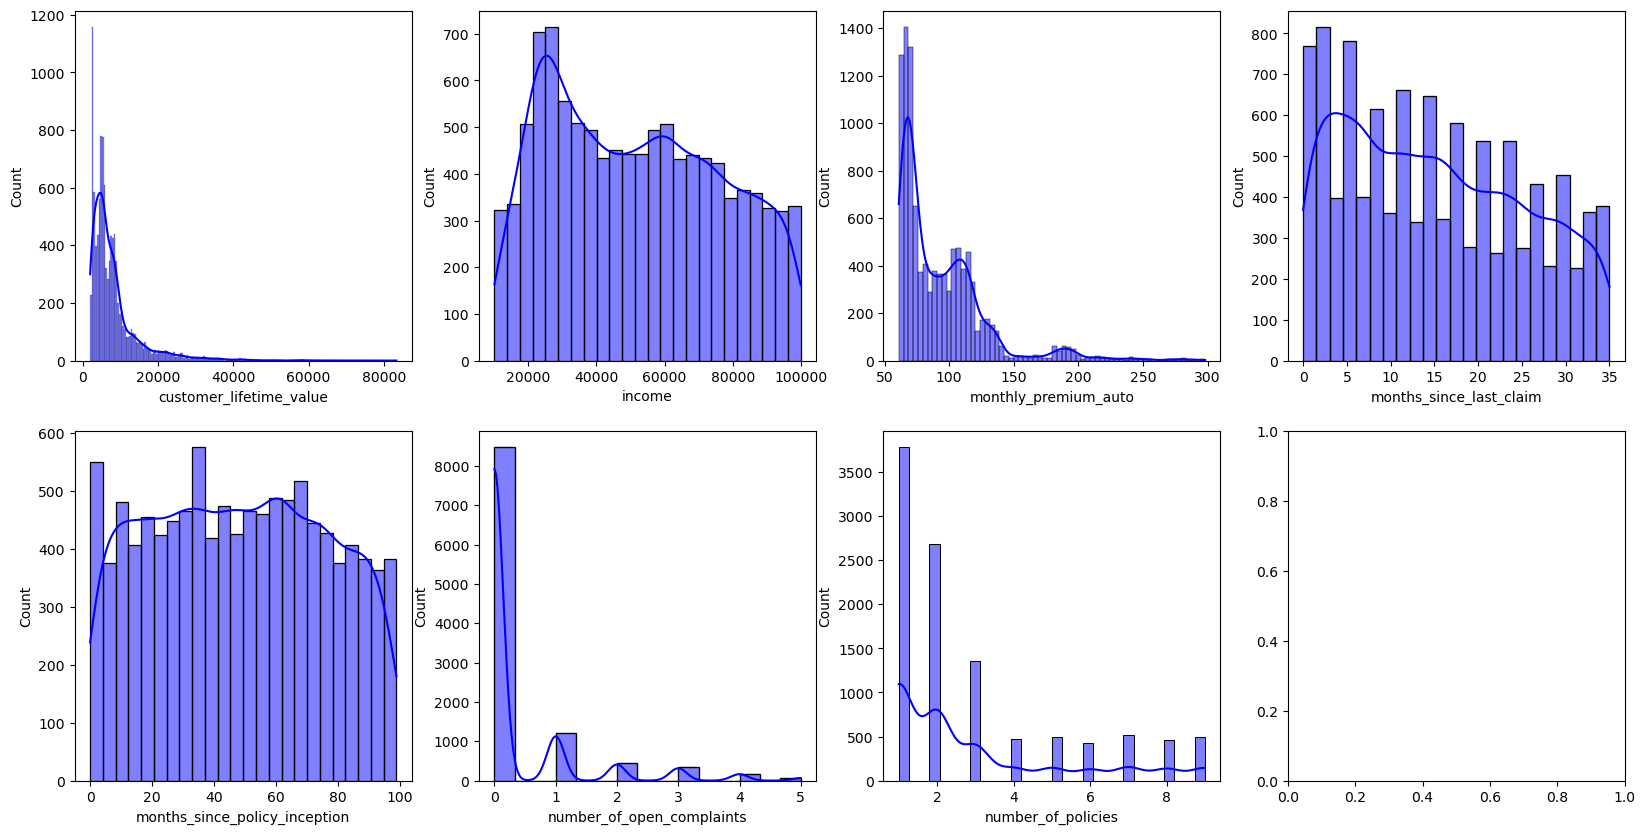

In [53]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.set_palette('pastel')
for i, col in enumerate(numerical):
    sns.histplot(data=numerical, x=col, color="blue", kde=True, ax=axs[i//4, i%4])
plt.show()


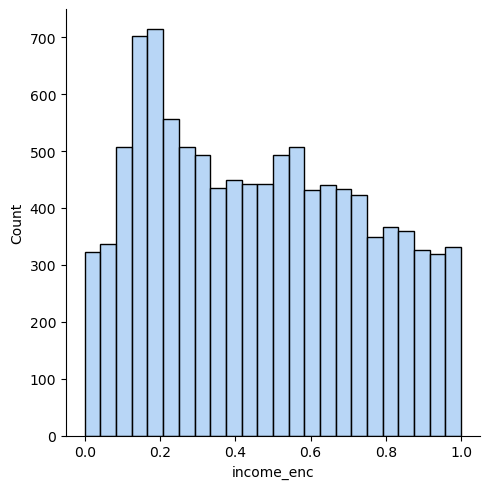

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numerical[['income']])
numerical['income_enc']=scaler.transform(numerical[['income']])
sns.displot(numerical['income_enc'])


In [ ]:
# Linear Regression
# X-y split (y is the target variable, which is the total claim amount)

In [55]:
numericalX = df.select_dtypes(np.number)
numericalX

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [58]:
#numericalX = hk_df.select_dtypes(np.number)
#categoricalX = X.select_dtypes(object)#X.select_dtypes("object")
#X = numericalX.drop('target_d', axis=1)
#y = numericalX.target_d
X = numericalX.drop('income', axis=1)
y = numericalX.income

In [59]:
#check NaNs
X.isna().any()

customer_lifetime_value          False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
dtype: bool

In [60]:
#remove any na
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [61]:
#check target variable
y

,income
0,48029
1,92260
2,22139
3,49078
4,23675
...,...
10684,61541
10685,61146
10686,39837
10687,64195


In [62]:
numericalX

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [64]:
columns=numericalX.drop('income', axis=1)

columns=columns.columns
columns

Index(['customer_lifetime_value', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [ ]:
## Linear Regression X-y split (y is the target variable, which is the total claim amount) Train-test split.

In [67]:
#Train the model
# test-train split
TT_RATIO = 0.2
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(5)

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
9877,21423,65,9,31,0,2,312
10069,8391,106,5,98,2,6,710
10317,3969,101,3,29,0,1,0
9796,14914,63,3,73,2,2,302
8995,18060,115,1,61,0,2,552


In [69]:
from sklearn.preprocessing import StandardScaler
#X_train is the data
X_train = np.array(X_train)#.reshape(-1,1)
scaler = StandardScaler()
X_train_std= scaler.fit(X_train)
X_train_std= X_train_std.transform(X_train)
X_train_std= pd.DataFrame(X_train_std)
X_train_std.columns = columns
#std["customer_lifetime_value2"]=numerical["customer_lifetime_value"]
X_train_std

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1.960751,-0.818409,-0.605527,-0.617389,-0.417266,-0.410084,-0.410276
1,0.057838,0.367470,-1.000293,1.788540,1.805812,1.257753,0.941654
2,-0.587856,0.222850,-1.197677,-0.689207,-0.417266,-0.827043,-1.470080
3,1.010316,-0.876257,-1.197677,0.890806,1.805812,-0.410084,-0.444244
4,1.469691,0.627784,-1.395060,0.459893,-0.417266,-0.410084,0.404958
...,...,...,...,...,...,...,...
8546,-0.056203,0.020383,0.677465,0.639440,-0.417266,0.006875,-1.201732
8547,3.970404,0.136079,0.184007,1.070352,-0.417266,-0.410084,-1.459890
8548,-0.548139,-0.847333,1.072232,-1.443304,4.028889,2.091671,0.092452
8549,0.722222,0.367470,0.776157,1.501265,-0.417266,-0.410084,0.119626


In [71]:
from sklearn.linear_model import LinearRegression

#model fitting
model=LinearRegression()    # model
model.fit(X_train_std, y_train)   # model train

LinearRegression()

In [72]:
#model parameters
model.coef_

array([[   13.51695798,  2894.09338742,  -744.551453  ,   -63.93081711,
          378.65398916,   -58.79668953, -4679.71467638]])

In [73]:
#model parameters
model.intercept_

array([51817.50906327])

In [78]:
#make prediction

y_pred = pd.DataFrame(model.predict(X_test),columns = ['income'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train),columns = ['income'])

/Users/marsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
y_pred

,income
0,-2.726480e+05
1,-2.591780e+06
2,-8.181463e+05
3,-1.116143e+05
4,-4.045511e+06
...,...
2133,-9.858414e+05
2134,-1.870403e+06
2135,-2.091703e+06
2136,-1.683943e+06


In [76]:
y_pred_train

,income
0,-9.393640e+05
1,-2.860169e+06
2,3.936233e+05
3,-9.837974e+05
4,-1.959210e+06
...,...
8546,3.625292e+04
8547,7.792456e+05
8548,-1.877129e+06
8549,-1.679588e+06


In [77]:
pd.concat([y_pred,y_pred_train], axis=1)

,income,income
0,-2.726480e+05,-9.393640e+05
1,-2.591780e+06,-2.860169e+06
2,-8.181463e+05,3.936233e+05
3,-1.116143e+05,-9.837974e+05
4,-4.045511e+06,-1.959210e+06
...,...,...
8546,NaN,3.625292e+04
8547,NaN,7.792456e+05
8548,NaN,-1.877129e+06
8549,NaN,-1.679588e+06


In [90]:
import statsmodels.api as sm

X_train_std = sm.add_constant(X_train_std) # adding a constant

model = sm.OLS(y_train, X_train_std).fit() # fitting the model

predictions_train = model.predict(X_train_std) # making predictions on training set

X_test_const_ct = sm.add_constant(X_train_std) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()t
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     28.47
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.78e-39
Time:                        10:02:29   Log-Likelihood:                -98530.
No. Observations:                8551   AIC:                         1.971e+05
Df Residuals:                    8543   BIC:                         1.971e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.182e+04    264.341    196.025      0.0